In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Setup data
data = pd.read_csv(f"../generated/benchmark.csv", sep=',')
data = data.groupby(['directory', 'type']).agg({'duration': 'median', 'actions': 'first', 'added': 'first', 'deleted': 'first', 'lines-left': 'first', 'lines-right': 'first'}).reset_index()



normalized = data.copy()
normalized['actions'] = normalized.apply((lambda row: row['actions'] / (row['lines-left'] + row['lines-right'])), axis=1)
# TODO: @nhubner find a way to normalize the durations
print(normalized.head())

          directory          type  duration   actions  added  deleted  \
0  assertfixer_1320           lcs       7.0  0.972006     43      564   
1  assertfixer_1320  lcs-no-parse       0.0  0.972006     43      564   
2  assertfixer_1320  seed-default      12.0  0.973561     44      565   
3  assertfixer_1320     seed-even       0.0  0.973561     44      565   
4      assertj_1944           lcs    1916.0  0.744998   2934     9212   

   lines-left  lines-right  
0         582           61  
1         582           61  
2         582           61  
3         582           61  
4       15533         9255  


# Actions

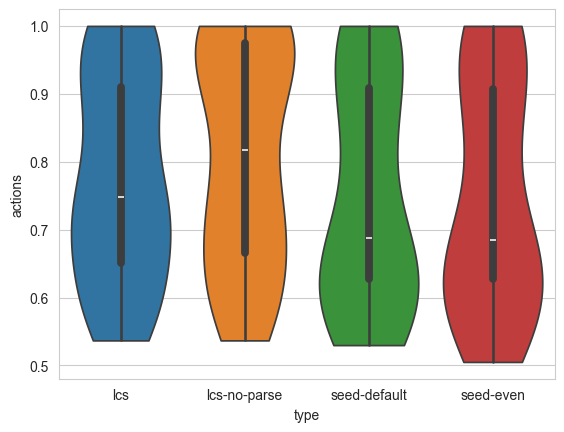

In [30]:
sns.violinplot(data=normalized, x="type", y="actions", hue="type", cut=0)
plt.show()

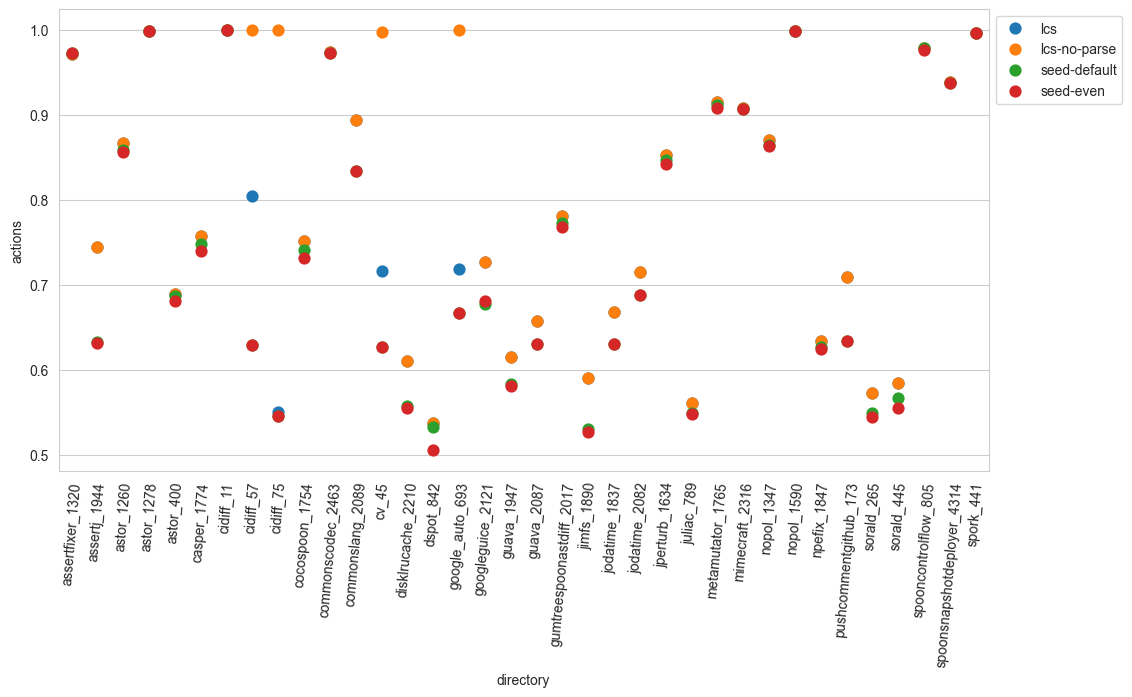

In [29]:
plt.figure(figsize=(12,6))
g = sns.pointplot(data=normalized, x="directory", hue="type", y="actions", linestyles="")
g.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=85)
plt.show()

# Durations

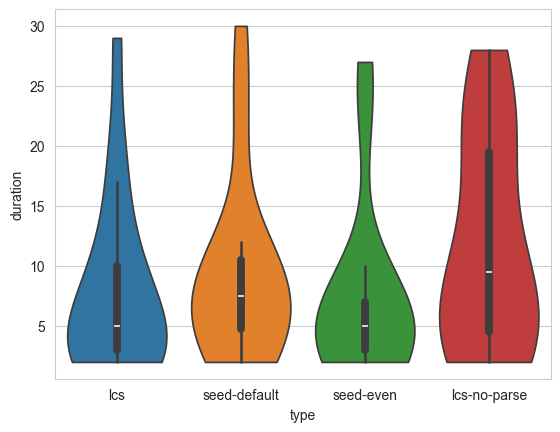

In [35]:
# normalized["duration"] = (normalized["duration"] - normalized["duration"].min()) / (normalized["duration"].max() - normalized["duration"].min())
no_outliers = data[data["duration"].between(data["duration"].quantile(0.25), data["duration"].quantile(0.75))]
sns.violinplot(data=no_outliers, x="type", hue="type", y="duration", cut=0)
plt.show()

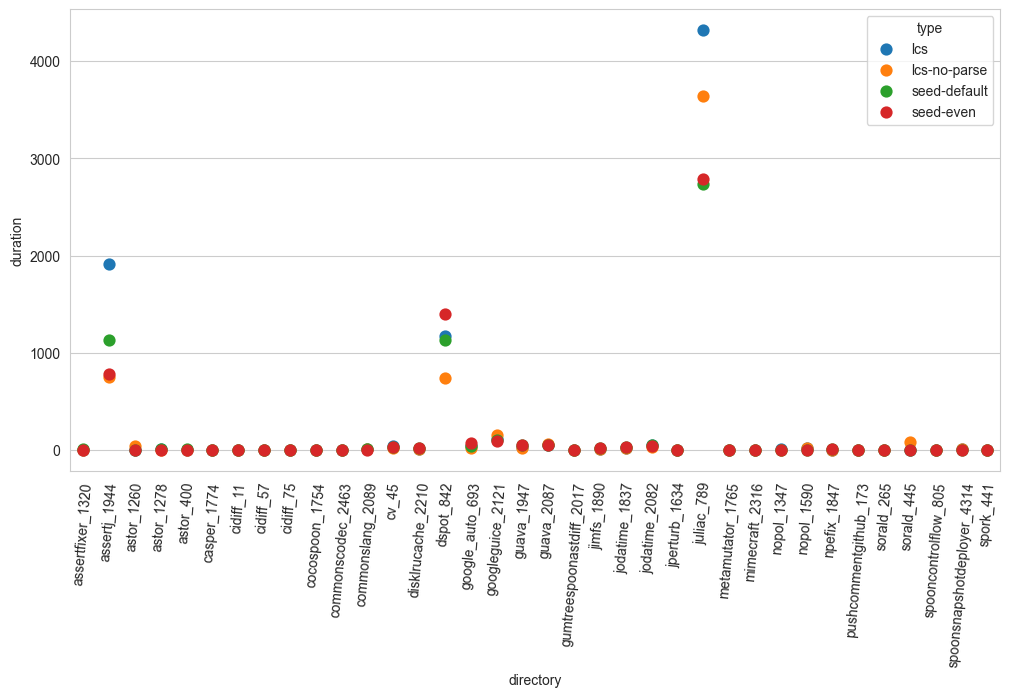

In [34]:
plt.figure(figsize=(12,6))
sns.pointplot(data=data, x="directory", hue="type", y="duration", linestyles="")
plt.xticks(rotation=85)
plt.show()